## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Introduction

#### Business Overview:

* Mzalendo ltd is a housing stakeholder that gives advice to homeowners so that they can buy or sell homes.
The company want to help homeowners to be able to predict the current and future prices of their houses depending on different features.

#### Challenges:
* Data quality issues: The dataset may contain errors, inconsistencies, or missing values, which can impact the accuracy of the regression analysis.

* Complexity of the housing market: The housing market can be complex and dynamic, and factors such as economic conditions, interest rates, and demographic changes can all impact home values. This can make it challenging to accurately predict the impact of renovations on home values.

* Limited resources: Building an accurate regression model can be time-consuming and resource-intensive, and may require specialized expertise in data analysis and statistics.

* Communication with stakeholders: It is important to effectively communicate the findings and recommendations to the stakeholders, who may have varying levels of technical expertise or understanding of the analysis. Clear and concise communication is essential to ensure that the stakeholders can make informed decisions based on the results.



#### Proposed Solution:
* Our proposed solution to address the business problem and meet the project objectives is to use multiple linear regression modeling to analyze the King County House Sales dataset, which contains information on various factors that can influence the value of a home.

#### Conclusion:
* We aim to use multiple linear regression modeling,So that we can analyze the King County House Sales dataset to identify the most important factors that impact the value of a home, build an accurate regression model to predict home values, and provide guidance to homeowners on how to increase the estimated value of their homes through renovations.


## Business Problem
#### The business problem for this project is to provide guidance to homeowners on how home renovations might increase the estimated value of their homes, and by what amount. 

## Objectives

* To identify the most important factors that affect the value of a home in a northwestern county, and to determine the extent to which these factors impact home values.
* To build a multiple linear regression model that accurately predicts the value of a home based on these factors.
* To use the regression model to provide guidance to homeowners on how home renovations can increase the estimated value of their homes, and by what amount.
* To evaluate the performance of the regression model using appropriate metrics, and to compare the results of different models to determine the best approach.
* To communicate the findings and recommendations to the stakeholders in a clear and concise manner, and to ensure that they understand the implications of the results for their business.


## Analytical Questions
1. Which features have the strongest correlation with home sale price?
2. Are there any variables that need to be transformed or standardized before being used in the model?
3. How can we evaluate the performance of our model and ensure that it is not overfitting to the data?
4. How can we communicate the results of our analysis to stakeholders in a clear and actionable manner?

## Data Understanding

#### We will need to carefully examine each variable and determine its relevance to our business problem, as well as identify any missing or erroneous values that may need to be cleaned or imputed.We may also need to consider the relationships between different variables, and whether any transformations or interactions may be necessary to build an accurate regression model.Overall, our goal in data understanding is to gain a comprehensive understanding of the dataset and ensure its quality and suitable for analysis.

# Loading Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [2]:
#load the data
data_df = pd.read_csv("data/kc_house_data.csv")
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Statistical Analysis

In [3]:
def analyze_dataset(filename):
    """
    This function  outputs information about the shape,
    columns, and information of the dataset using the Pandas library.
    """
    # Output the shape of the dataset
    print("Shape of dataset:", data_df.shape)
    
    # Output the column names of the dataset
    print("Column names:", list(data_df.columns))
    
    # Output information about the dataset
    print(data_df.info())
    # output descriptive statistics about the dataset
    print(data_df.describe())

In [4]:
analyze_dataset("kc_house_data.csv")

Shape of dataset: (21597, 21)
Column names: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non

# Data Pre_processing

# Duplicates

In [5]:
#checking for duplicates 
print("Number of duplicates: ",data_df.duplicated().sum())

Number of duplicates:  0


There are no duplicates in our data

## Missing Values
> We decided to define a function to help with checking for missing values.
> It checks for the value counts of the total missing values in each column and the percentages of the missing values in the said columns.

In [6]:
 desc = []
for i in data_df.columns:
    desc.append([
        i,
        data_df[i].dtypes,
        data_df[i].isna().sum(),
        round((data_df[i].isna().sum()/len(data_df))*100),
        data_df[i].nunique(),
        data_df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=desc, columns=['Feature','Dtypes','Null','%Null','Nunique','Sample_Unique'])

,Feature,Dtypes,Null,%Null,Nunique,Sample_Unique
0,id,int64,0,0.0,21420,"[1081800070, 2322029048]"
1,date,object,0,0.0,372,"[11/11/2014, 5/24/2015]"
2,price,float64,0,0.0,3622,"[413500.0, 502700.0]"
3,bedrooms,int64,0,0.0,12,"[11, 4]"
4,bathrooms,float64,0,0.0,29,"[4.25, 2.5]"
5,sqft_living,int64,0,0.0,1034,"[4190, 3488]"
6,sqft_lot,int64,0,0.0,9776,"[9383, 5007]"
7,floors,float64,0,0.0,6,"[2.0, 3.0]"
8,waterfront,object,2376,11.0,2,"[YES, NO]"
9,view,object,63,0.0,5,"[AVERAGE, nan]"


In [7]:
# a more interpretable version
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    
    return missing


missing_data = missing_values(data_df)
missing_data

,Missing Values,Percentage(%)
yr_renovated,3842,0.177895
waterfront,2376,0.110015
view,63,0.002917
sqft_lot15,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000


> The columns yr_renoveted, view and waterfront have missing values of ```17%```, ```11%```, ```0.2%``` respectively hence we may consider to fill or drop them in relation to our analysis.

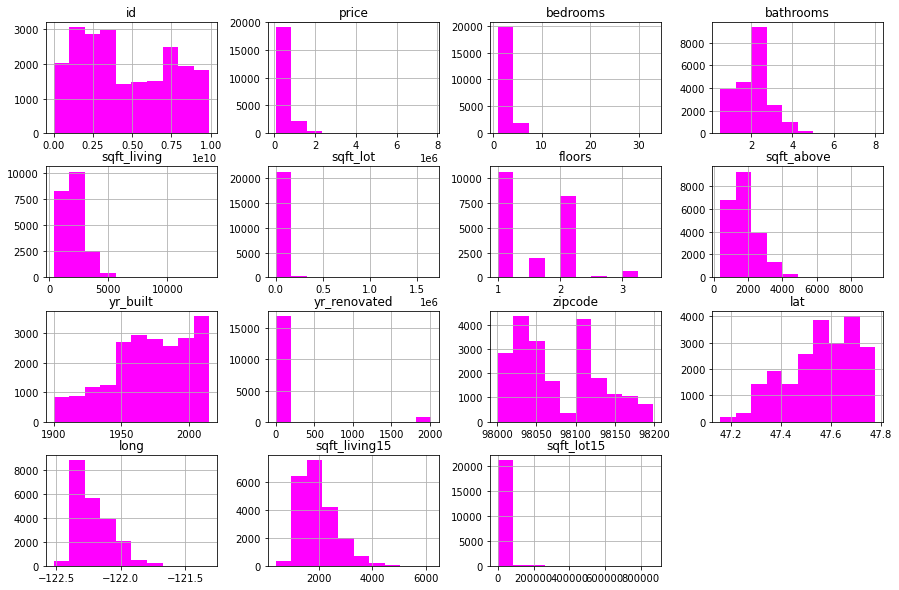

In [8]:
data_df.hist(figsize=(15,10), color = "magenta");

## Univariate Analysis

> Here, we explored certain columns in the dataset to display their counts as well as plot visualizations accordingly so as to get a better understanding of the values present in the columns.
> The strategy used was identifying:
  * Categorical Columns
  * Numeric Columns

### Categorical columns


> Our categorical columns are:
* waterfront      
* view            
* condition      
* grade    

~ We started by defining a function to check for the value caounts in the above columns and plot visualizations for the columns as well.

In [9]:
# identify the categorical variables in the dataset and visualize them
# define a function to use to the above
# Fuction to get the value counts of the data in the columns
def get_value_counts(df, col):
    ''' Returns the value counts of a column in a dataframe '''
    counts = df[col].value_counts(dropna=False)
    return counts

# Function to visualise the the data in the columns
def plot_data(df, col, title):
    ''' Plots the value counts of a column in a dataframe as a bar chart '''
    get_value_counts(df, col).plot(kind='bar', figsize=(12, 6), color='orange', edgecolor='black')
    plt.title(title)
    plt.xticks(rotation=0);

NO     19075
NaN     2376
YES      146
Name: waterfront, dtype: int64


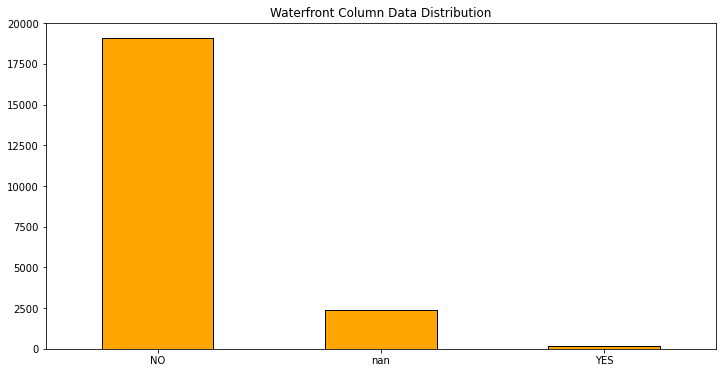

In [10]:
# Identify the unique values (and counts) in the 'waterfront' column
print(get_value_counts(data_df, 'waterfront'))

# Visualise the data distribution
plot_data(data_df, 'waterfront', 'Waterfront Column Data Distribution') 

* The bargraph above shows the response of houses that have waterfront therfore, NO being response with the highest count followed by NAN (Not a Number ie those that were not filled) and lastly YES was the least responce*

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64


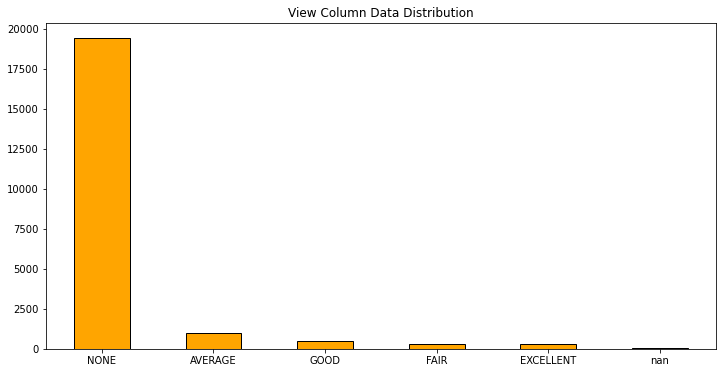

In [11]:
# Identify the unique values (and counts) in the 'waterfront' column
print(get_value_counts(data_df, 'view'))

# Visualise the data distribution
plot_data(data_df, 'view', 'View Column Data Distribution') 

* Bar graph of view of houses in the King's county house data with NONE being the highest and  nan being the lowest*

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64


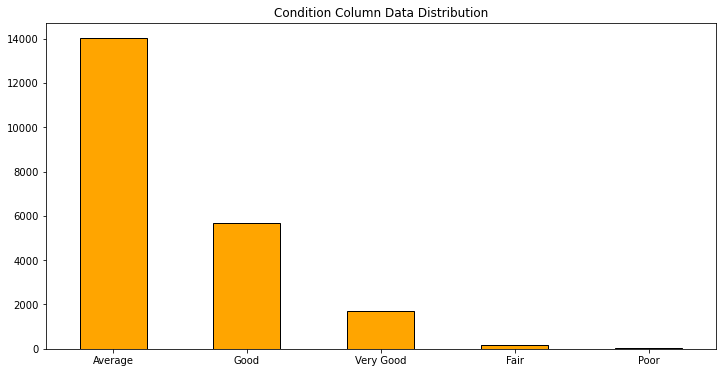

In [12]:
# Identify the unique values (and counts) in the 'waterfront' column
print(get_value_counts(data_df, 'condition'))

# Visualise the data distribution
plot_data(data_df, 'condition', 'Condition Column Data Distribution') 

* The bar graph above shows visualization of the condition of houses from Average to poor being the least rated*

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


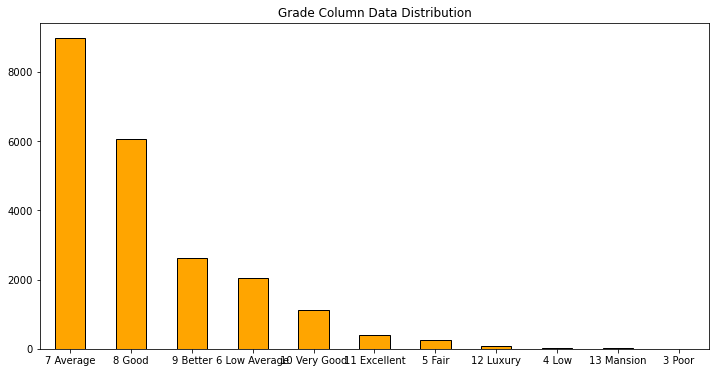

In [13]:
# Identify the unique values (and counts) in the 'waterfront' column
print(get_value_counts(data_df, 'grade'))

# Visualise the data distribution
plot_data(data_df, 'grade', 'Grade Column Data Distribution') 

* Visualization of a bar graph of grades from Average ie 7 to poor ie 3 of houses on the Kings county house data*

### Numeric Features
> Shows Quantitave value of the data.
> Our numeric columns are:
* price
* sqft_living
* yr_built
* long
* sqft_living15

> We defined a function as well to display the descriptive analysis of the columns and also to plot the distribution of the numeric values of the numeric columns.

In [14]:
def describe_data(data_df, col):
    ''' Returns the statistics of a column in a dataframe '''
    col_data = data_df[col]
    print("Statistics for column '{}'".format(col))
    print("Minimum value: {}".format(col_data.min()))
    print("Maximum value: {}".format(col_data.max()))
    print("Mean: {}".format(col_data.mean()))
    print("Median: {}".format(col_data.median()))
    print("Standard deviation: {}".format(col_data.std()))
def plot_numeric_distribution(data_df, col, title, bins=10):
    ''' Plots the distribution of a column in a dataframe as a histogram, kde and boxplot '''
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.histplot(data=data_df, x=col, ax=ax, kde=True, color='lightblue', bins=bins, edgecolor='black')
    ax.set_title(title)
    plt.tight_layout()

In [15]:
describe_data(data_df, 'price')

Statistics for column 'price'
Minimum value: 78000.0
Maximum value: 7700000.0
Mean: 540296.5735055795
Median: 450000.0
Standard deviation: 367368.1401013945


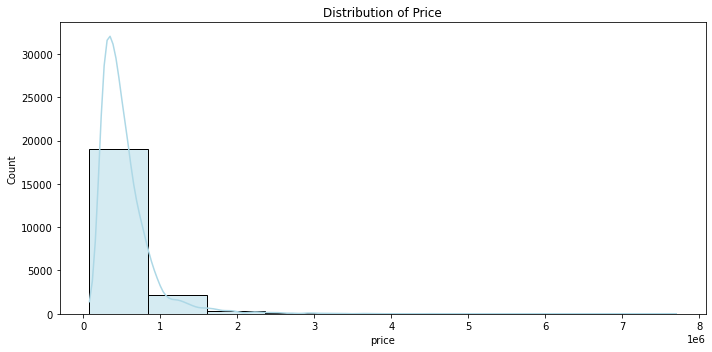

In [16]:
plot_numeric_distribution(data_df, 'price', 'Distribution of Price')

* A histrogram of price verses count where price is normally disrtibuted*

In [17]:
describe_data(data_df, 'sqft_living')

Statistics for column 'sqft_living'
Minimum value: 370
Maximum value: 13540
Mean: 2080.3218502569803
Median: 1910.0
Standard deviation: 918.1061250800805


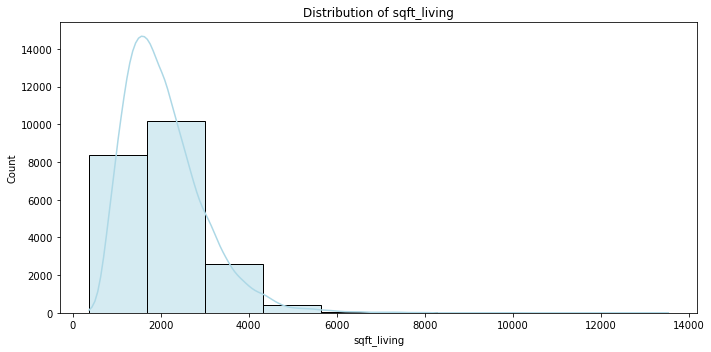

In [18]:
plot_numeric_distribution(data_df, 'sqft_living', 'Distribution of sqft_living')

* A histogram of sqft_living where is Normally distributed*

In [19]:
describe_data(data_df, 'yr_built')

Statistics for column 'yr_built'
Minimum value: 1900
Maximum value: 2015
Mean: 1970.9996758809093
Median: 1975.0
Standard deviation: 29.375234132441644


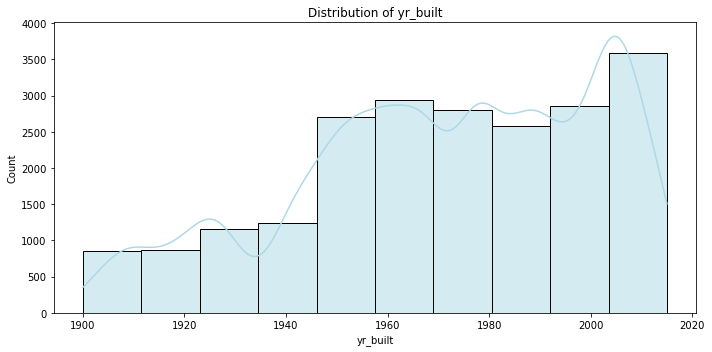

In [20]:
plot_numeric_distribution(data_df, 'yr_built', 'Distribution of yr_built')

* Ditribution of yr_built from 1990 to 2010*

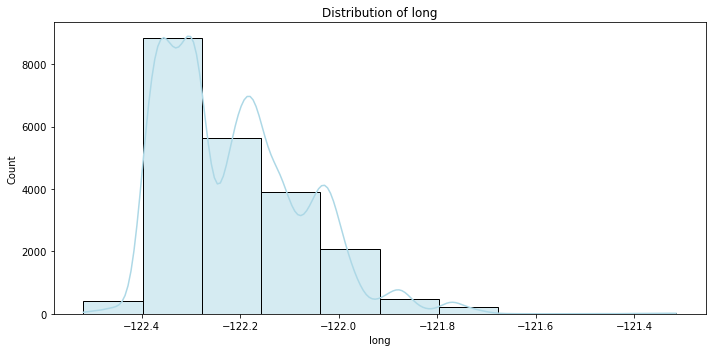

In [21]:
plot_numeric_distribution(data_df, 'long', 'Distribution of long')

* Distribution of longitudes*

In [22]:
describe_data(data_df, 'sqft_living15')

Statistics for column 'sqft_living15'
Minimum value: 399
Maximum value: 6210
Mean: 1986.6203176367087
Median: 1840.0
Standard deviation: 685.2304719001586


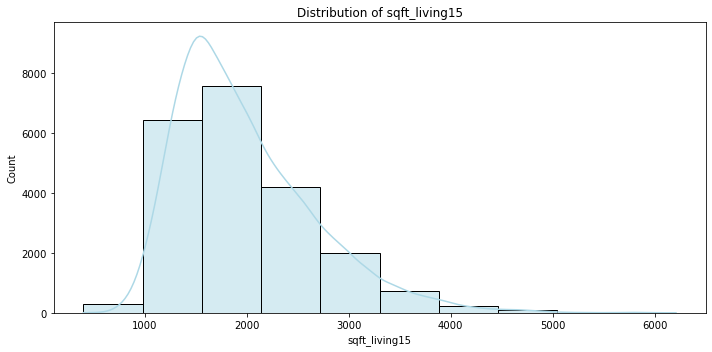

In [23]:
plot_numeric_distribution(data_df, 'sqft_living15', 'Distribution of sqft_living15')

* A histogram of sqft_living where it is normally distributed*

## Correlation

In [24]:
data_df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

> As seen from the above analysis, we saw that the column with the highest correlation to price is the sqft_living column with a correlation of 70%.

> For a better understanding of the correlations, we plotted a correlation heatmap to see the correlations between the columns in the dataset.

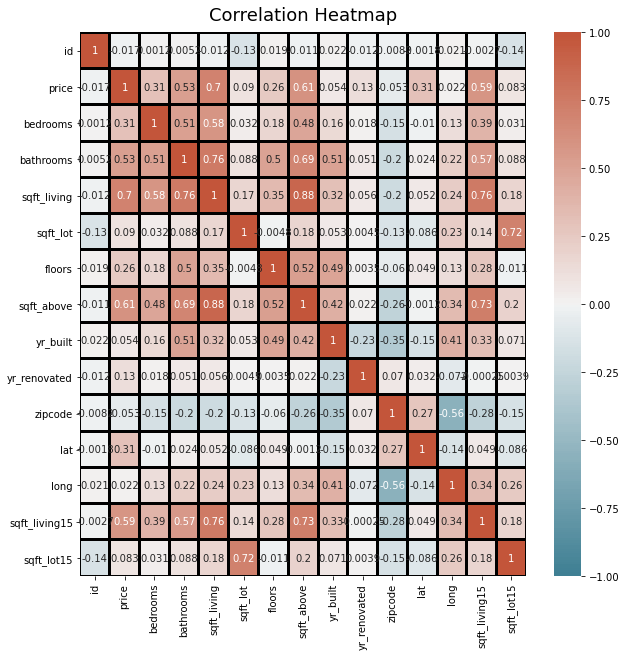

In [25]:
#Correlation heatmap
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220,20,n=200)
heatmap = sns.heatmap(
    data_df.corr(),vmin=-1, vmax=1,center = 0,
    annot=True,cmap=cmap,linewidths=2, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## Dropping Columns

In [26]:
#dropping sqft_above,sqft_basement,floors,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated inorder to determine the data we are working with.
data_df.drop(['sqft_above','sqft_basement','floors','zipcode','lat','long','sqft_living15','sqft_lot15','yr_renovated', 'date'], axis=1, inplace =True)

In [27]:
# calling our data
data_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,NaN,NONE,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,NO,NONE,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,NO,NONE,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,NO,NONE,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,NO,NONE,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,NO,NONE,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,NO,NONE,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,NO,NONE,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,NaN,NONE,Average,8 Good,2004


In [28]:
#get the sum of null values
data_df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
waterfront     2376
view             63
condition         0
grade             0
yr_built          0
dtype: int64

In [29]:
#define a function to fillnas with mode 
columns =['waterfront', 'view']
def fill_numeric_missing(dat, cols):
    for col in cols:
        dat[col].fillna(dat[col].mode()[0], inplace=True)
fill_numeric_missing(data_df, columns) 

In [30]:
# function is to fill in any missing values
fill_numeric_missing(data_df, columns)

In [31]:
# Cheaking null values sum
data_df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
waterfront     0
view           0
condition      0
grade          0
yr_built       0
dtype: int64

### Data Types 

In [32]:
#Print dataframe head to have overview
data_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,NO,NONE,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,NO,NONE,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,NO,NONE,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,NO,NONE,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,NO,NONE,Average,8 Good,1987


In [33]:
#get the dtypes 
data_df.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
waterfront      object
view            object
condition       object
grade           object
yr_built         int64
dtype: object

*For now the data seems to be fine we can proceed as it is unless otherwise* 

### Outliers 

In [34]:
def create_boxplot(data, columns, figsize=(10,8), orient='v', palette='Set2', whis=1.5):
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(data=data[columns], orient=orient, palette=palette, whis=whis, ax=ax)
    ax.set_title('Boxplot of {}'.format(', '.join(columns)))
    plt.show()

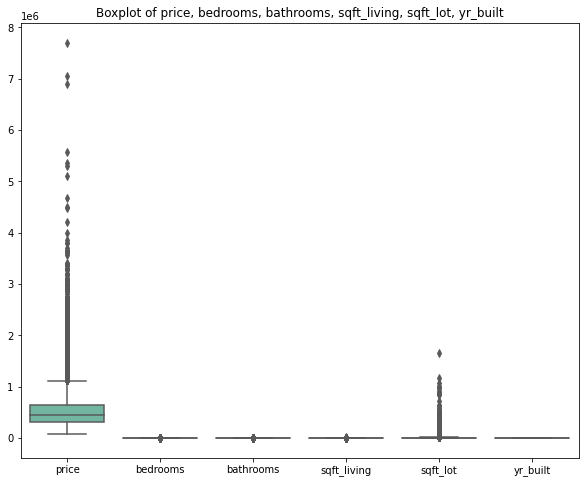

In [35]:
#get the outliers in a boxplot 
scores_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']
create_boxplot(data=data_df, columns=scores_columns, figsize=(10,8), orient='v', palette='Set2', whis=1.5)


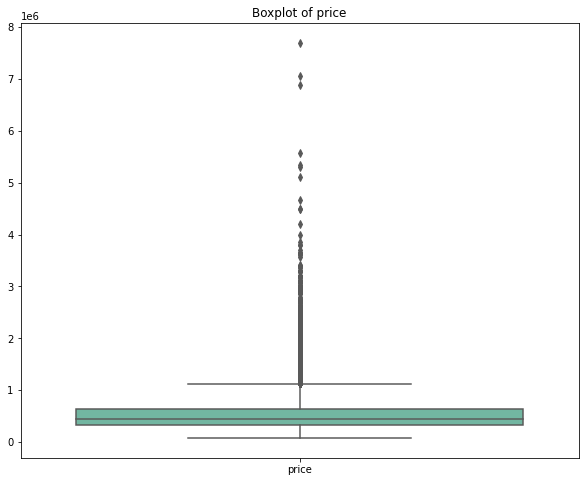

In [36]:
# Price has the highest count of outliers
# Lets plot price on itrs own
create_boxplot(data=data_df, columns=['price'], figsize=(10,8), orient='v', palette='Set2', whis=1.5)


In [37]:
# Define a function to calculate Interquartile range (IQR)
def IQR_outliers(dat, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = dat[column].quantile(0.25)
    Q3 = dat[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((dat[column]<(Q1-1.5*IQR)) | (dat[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(dat[column][val])

    
    return outliers, Q1, Q3, IQR



In [38]:
# Print the frequency of each unique outlier value in the price column
price_outliers = IQR_outliers(data_df, "price")[0]
outliers_series = pd.Series(price_outliers)
outliers_counts = outliers_series.value_counts()
print(outliers_counts)

1200000.0    40
1150000.0    37
1300000.0    35
1250000.0    34
1400000.0    31
             ..
2280000.0     1
2640000.0     1
2240000.0     1
2410000.0     1
2730000.0     1
Length: 182, dtype: int64


In [39]:
#sort values to see the highest head and tail values 
data_df['price'].sort_values()

15279      78000.0
465        80000.0
16184      81000.0
8267       82000.0
2139       82500.0
           ...    
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 21597, dtype: float64

#### Outliers conclusion 
* smallest cost $78000- highest cost $ 7700000
* Does it make sense *YES*, why its real data 
* Next 
  * Filter out outliers of price variable

In [40]:
# Filtering out outliers of price variable
data_df = data_df[(data_df.price < data_df.price.quantile(.995)) 
                        & (data_df.price > data_df.price.quantile(.005))]                        

*The price variable should be less than 99.5TH percentile of the prices in the dataset(meaning only the top 0.5% are include)*


*Price variables should be grater than the 0.5TH percentile of all the prices in the dataset(only the bottom of 0.5% are included)*

<AxesSubplot:xlabel='price'>

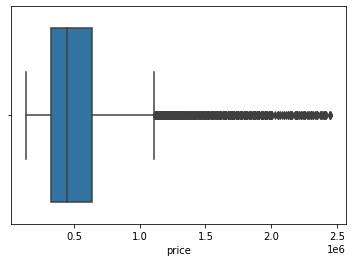

In [41]:
# This is a cleaner version after we filtered out the outliers
sns.boxplot(data_df['price'])

## Testing the Assumptions

### Linearity

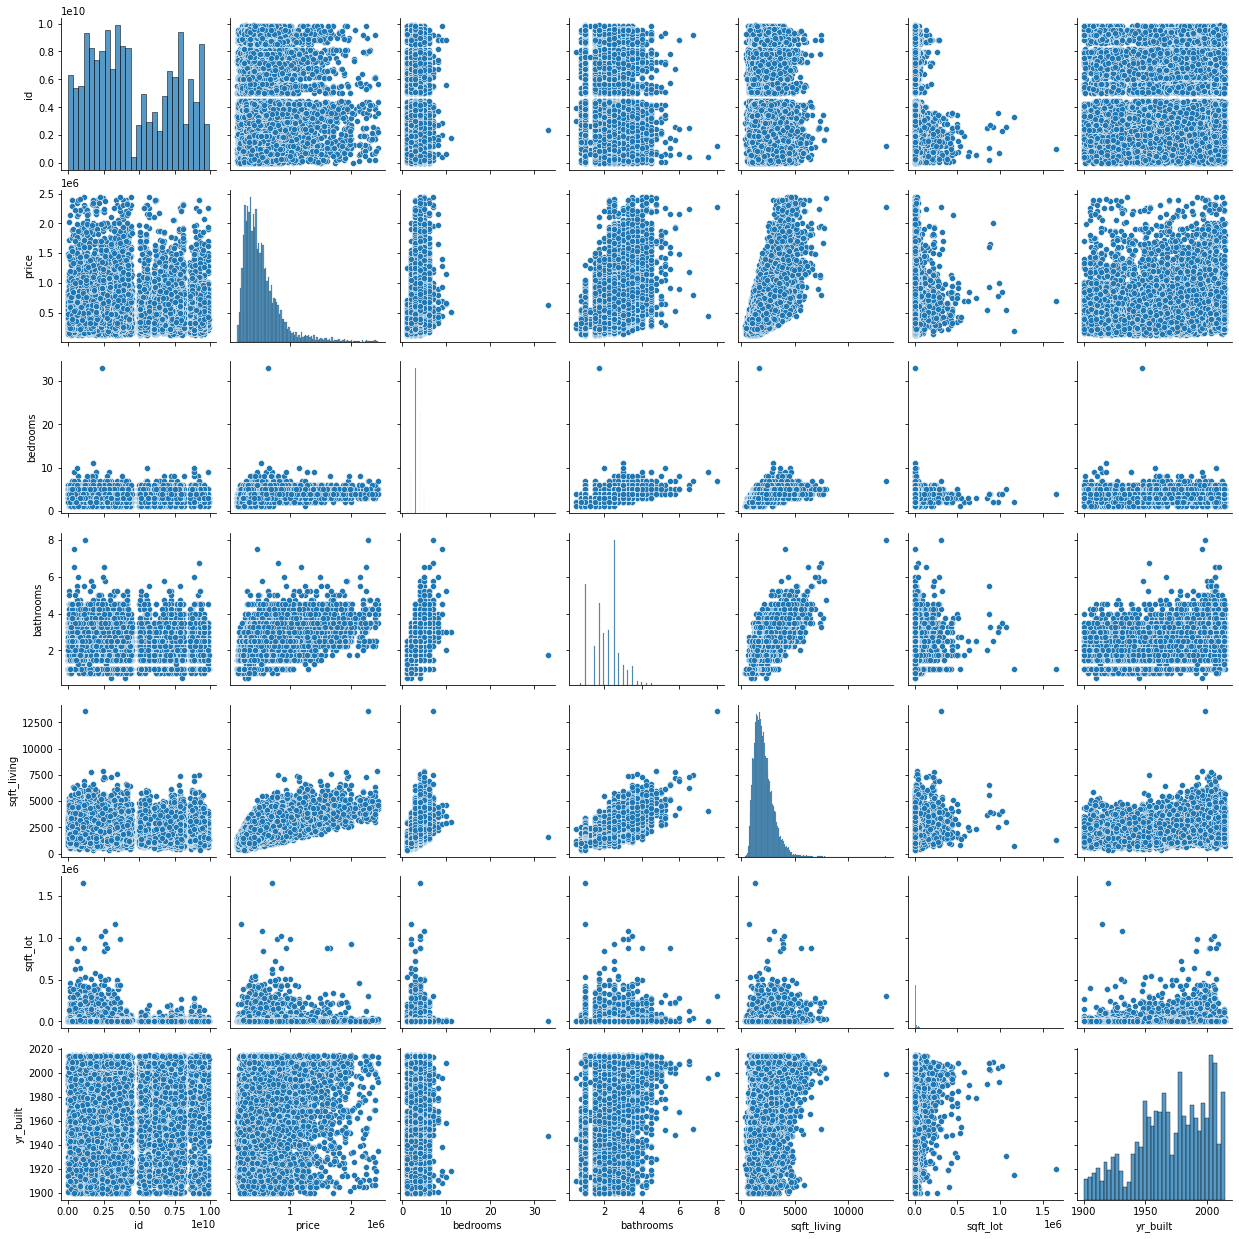

In [42]:
sns.pairplot(data_df)

we plotted a pair plot to check the linearity between various variables

## Bivariate Analysis

In [43]:
def scatterplot(df, x_col, y_col, hue_col):
    """Plots a scatterplot between two variables in a pandas DataFrame"""
    x_data = df[x_col]
    y_data = df[y_col]
    hue= df[hue_col]
    sns.scatterplot(data=df, x=x_data, y=y_data, hue=hue_col)


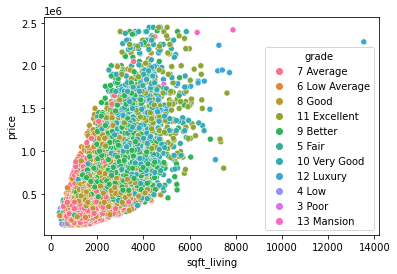

In [44]:
scatterplot(data_df, "sqft_living", "price", "grade")

##### From the scatter plot, there seems to have a linear relation between squarefoot living and price

##### The average squarefoot living is 5000 square foot with a grade of very good and a price of 150,000

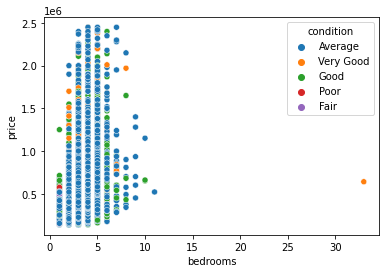

In [45]:
scatterplot(data_df, "bedrooms", "price","condition")

##### from the plot above, bedrooms seems to be a descrete variable having an average of between 4 and 5 

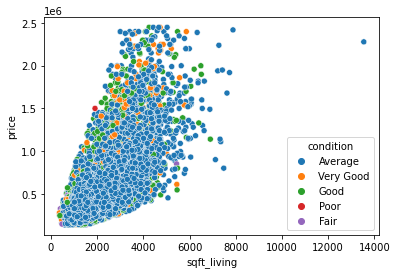

In [46]:
scatterplot(data_df, "sqft_living", "price","condition")

<AxesSubplot:xlabel='waterfront', ylabel='price'>

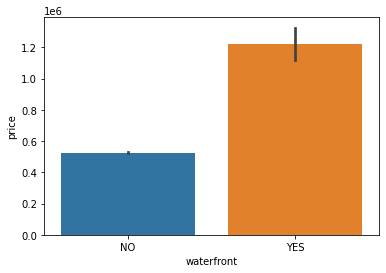

In [47]:
#visualizing categorical variable
waterfront = data_df.waterfront
data =pd.concat([data_df["price"], data_df["waterfront"]], axis=1)
sns.barplot(x=data["waterfront"], y=data["price"])

# Build a Baseline Simple Linear Regression Model

In [48]:
data_df.corr()['price']

id            -0.022408
price          1.000000
bedrooms       0.309465
bathrooms      0.509482
sqft_living    0.682382
sqft_lot       0.098753
yr_built       0.053157
Name: price, dtype: float64

In [49]:
y= data_df['price']
X_baseline= data_df[['sqft_living']]

In [50]:
model= sm.OLS(endog= y, exog= sm.add_constant(X_baseline))
results= model.fit()

In [51]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 1.863e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:43:08   Log-Likelihood:            -2.9384e+05
No. Observations:               21381   AIC:                         5.877e+05
Df Residuals:                   21379   BIC:                         5.877e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.398e+04   3939.584      8.625      

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
base_mae= mean_absolute_error(y, results.predict(sm.add_constant(X_baseline)))
print("The mean absolute error is: " , base_mae)

The mean absolute error is:  160438.91259561246


### Interprating the model
Overall this model is statistically significant and explains about 47% of the variance in price.

 The model is off by about $160,438.91.
 
 The intercept is at about $34k. This means that a zero square foot living house would sell for $34k.

The coefficient for square foot living is about $239. This means for each additional squarefoot, the house costs about $239 more. 

The model explains 47% of the variance in  price but we can improve the model to 50% by doing a multi regression model

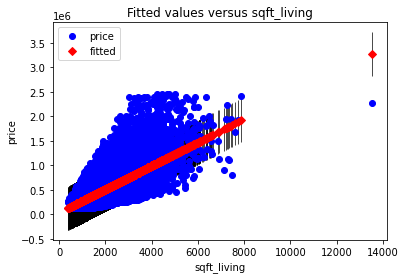

In [53]:
#visualizing the model
sm.graphics.plot_fit(results, "sqft_living")
plt.show()

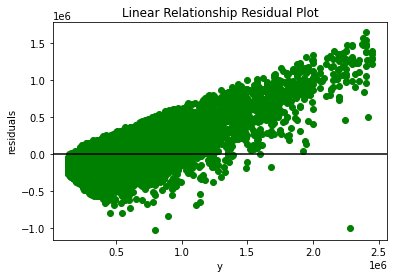

In [54]:
#visualizing the residuals
fig, ax = plt.subplots()

ax.scatter(y, results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

##### Preparing the categorical variables for multiple linear regression.

In [55]:
categoricals = data_df.select_dtypes('object')
categoricals

,waterfront,view,condition,grade
0,NO,NONE,Average,7 Average
1,NO,NONE,Average,7 Average
2,NO,NONE,Average,6 Low Average
3,NO,NONE,Very Good,7 Average
4,NO,NONE,Average,8 Good
...,...,...,...,...
21592,NO,NONE,Average,8 Good
21593,NO,NONE,Average,8 Good
21594,NO,NONE,Average,7 Average
21595,NO,NONE,Average,8 Good


In [56]:
for col in categoricals:
    print(data_df[col].value_counts(), "\n")

NO     21268
YES      113
Name: waterfront, dtype: int64 

NONE         19342
AVERAGE        942
GOOD           498
FAIR           324
EXCELLENT      275
Name: view, dtype: int64 

Average      13887
Good          5628
Very Good     1686
Fair           157
Poor            23
Name: condition, dtype: int64 

7 Average        8958
8 Good           6063
9 Better         2612
6 Low Average    1984
10 Very Good     1108
11 Excellent      357
5 Fair            210
12 Luxury          63
4 Low              21
13 Mansion          4
3 Poor              1
Name: grade, dtype: int64 



In [57]:
dummy_df= data_df.copy()
dummy_df= pd.get_dummies(data = data_df, columns=["condition"])
dummy_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,grade,yr_built,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,221900.0,3,1.00,1180,5650,NO,NONE,7 Average,1955,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,NO,NONE,7 Average,1951,1,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,NO,NONE,6 Low Average,1933,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,NO,NONE,7 Average,1965,0,0,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,NO,NONE,8 Good,1987,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,NO,NONE,8 Good,2009,1,0,0,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,NO,NONE,8 Good,2014,1,0,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,NO,NONE,7 Average,2009,1,0,0,0,0
21595,291310100,400000.0,3,2.50,1600,2388,NO,NONE,8 Good,2004,1,0,0,0,0


We performed a one hot encoding on the conditional column which is categorical variable to look if it improves the model

In [58]:
dummy_df.drop("condition_Poor", axis=1, inplace=True)


In [59]:
dummy_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,grade,yr_built,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,7129300520,221900.0,3,1.00,1180,5650,NO,NONE,7 Average,1955,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,NO,NONE,7 Average,1951,1,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,NO,NONE,6 Low Average,1933,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,NO,NONE,7 Average,1965,0,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,NO,NONE,8 Good,1987,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,NO,NONE,8 Good,2009,1,0,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,NO,NONE,8 Good,2014,1,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,NO,NONE,7 Average,2009,1,0,0,0
21595,291310100,400000.0,3,2.50,1600,2388,NO,NONE,8 Good,2004,1,0,0,0


#### Multiple regression model.

In [60]:
dummy_df.corr()['price']

id                    -0.022408
price                  1.000000
bedrooms               0.309465
bathrooms              0.509482
sqft_living            0.682382
sqft_lot               0.098753
yr_built               0.053157
condition_Average      0.010051
condition_Fair        -0.055297
condition_Good        -0.037820
condition_Very Good    0.063167
Name: price, dtype: float64

In [61]:
X_2 = dummy_df.drop(['id', 'price','waterfront','view','grade'], axis=1)
X_2

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,3,1.00,1180,5650,1955,1,0,0,0
1,3,2.25,2570,7242,1951,1,0,0,0
2,2,1.00,770,10000,1933,1,0,0,0
3,4,3.00,1960,5000,1965,0,0,0,1
4,3,2.00,1680,8080,1987,1,0,0,0
...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,2009,1,0,0,0
21593,4,2.50,2310,5813,2014,1,0,0,0
21594,2,0.75,1020,1350,2009,1,0,0,0
21595,3,2.50,1600,2388,2004,1,0,0,0


In [62]:
Multiple_model = sm.OLS(y, sm.add_constant(X_2))
Multiple_results = Multiple_model.fit()
Multiple_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     2625.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:43:40   Log-Likelihood:            -2.9258e+05
No. Observations:               21381   AIC:                         5.852e+05
Df Residuals:                   21371   BIC:                         5.853e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.114e+06   1.28e+05     39.949      0.000    4.86e+06    5.36e+06
bedrooms            -5.546e+04   1975.937    -28.070      0.000   -5.93e+04   -5.16e+04
bathrooms            7.311e+04   3275.890     22.318      0.000    6.67e+04    7.95e+04
sqft_living           255.9469      2.694     95.024      0.000     250.667     261.226
sqft_lot               -0.1994      0.036     -5.582      0.000      -0.269      -0.129
yr_built            -2586.9516     62.727    -41.241      0.000   -2709.902   -2464.001
condition_Average    1.912e+04   4.44e+04      0.431      0.667   -6.79e+04    1.06e+05
condition_Fair       -4.79e+04   4.74e+04     -1.011      0.312   -1.41e+05     4.5e+04
condition_Good       1.669e+04   4.44e+04      0.376      0.707   -7.03e+04    1.04e+05
condition_Very Good  5.153e+04   4.46e+04      1.156      0.248   -3.59e+04    1.39e+05
==============================================================================
Omnibus:                     6910.168   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40892.854
Skew:                           1.428   Prob(JB):                         0.00
Kurtosis:                       9.144   Cond. No.                     4.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# Evaluating performance of the model.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
Multiple_mae= mean_absolute_error(y, Multiple_results.predict(sm.add_constant(X_2)))
print("The mean absolute error is: " , Multiple_mae)


The mean absolute error is:  149576.7143410153


In [64]:
print("The R_squared adjusted for Baseline model is: ", results.rsquared_adj)
print("The R_squared adjusted for Multiple model is: ", Multiple_results.rsquared_adj)


The R_squared adjusted for Baseline model is:  0.46562076987963474
The R_squared adjusted for Multiple model is:  0.5248176357250769


### Interprating the model
Overall this model is statistically significant and explains about 53% of the variance in price. 

The model is off by about $149,576.71.

The intercept is at about $5,114,000.

The coefficient for square foot living is about $256, bathrooms $73110, one rating of average condition is $19120, good condition $16690, very good condition $51530 . 

The model explains 53% of the variance in  price but we can improve the model to 60% by doing log transformation on the multi regrssion model

## Partial Regression Plots

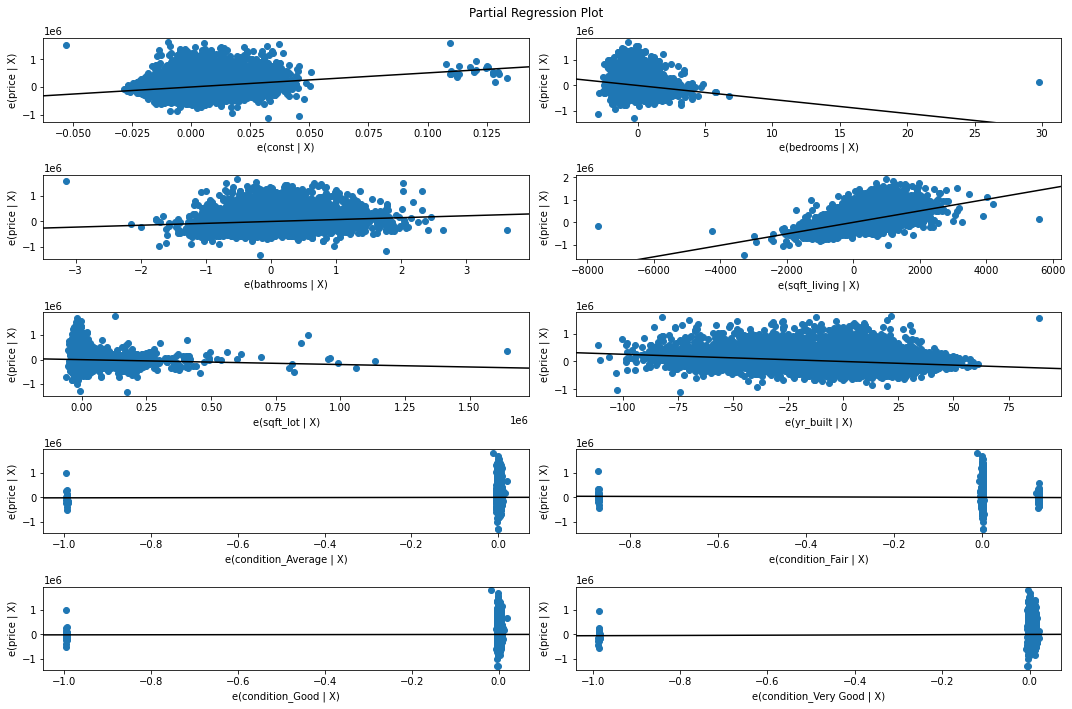

In [65]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(Multiple_results, fig=fig)
plt.tight_layout()
plt.show()

## Log Transformations of the Multiple Regression Model

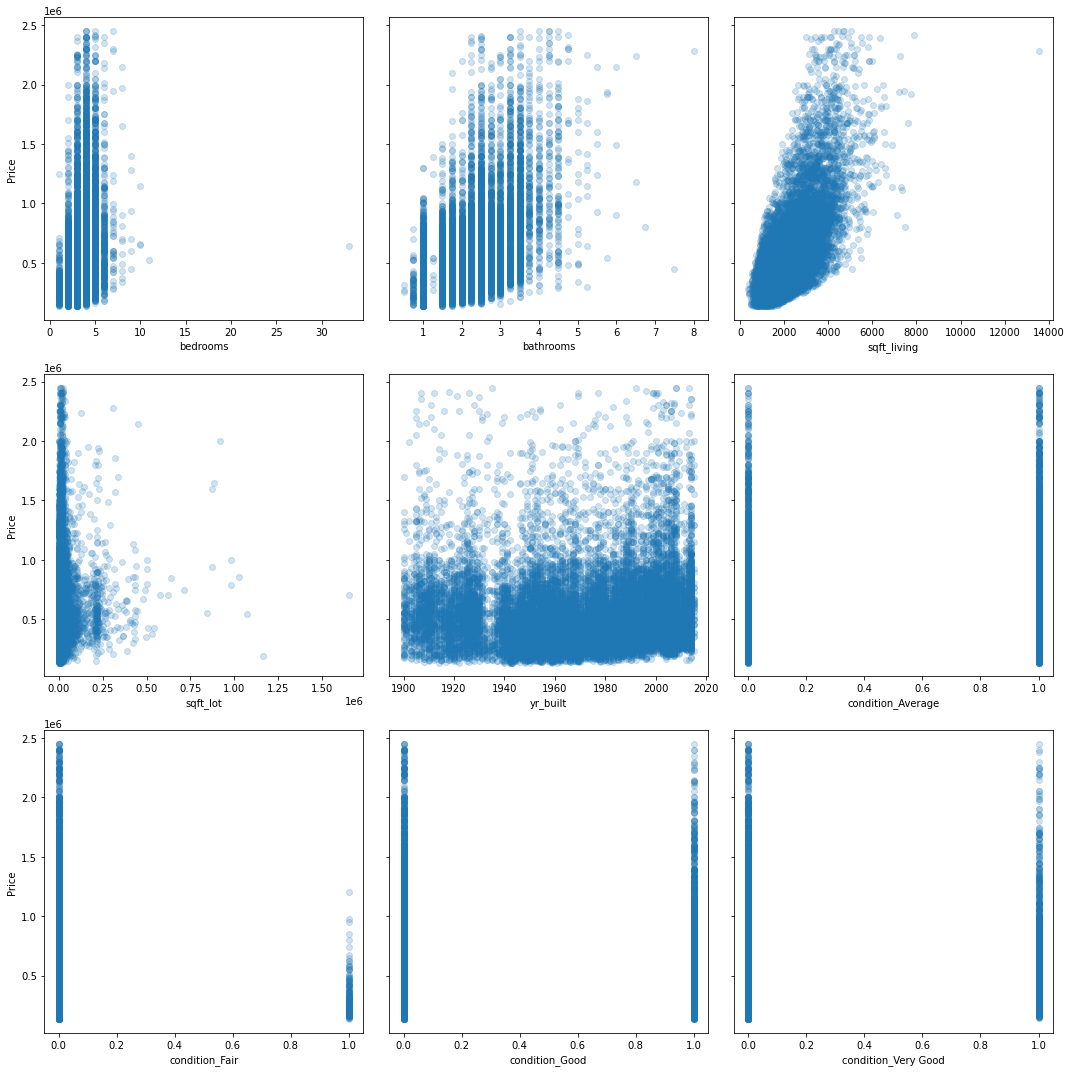

In [66]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15), sharey=True)

for i, column in enumerate(X_2.columns):
    # Locate applicable axes
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X_2[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("Price")

fig.tight_layout()

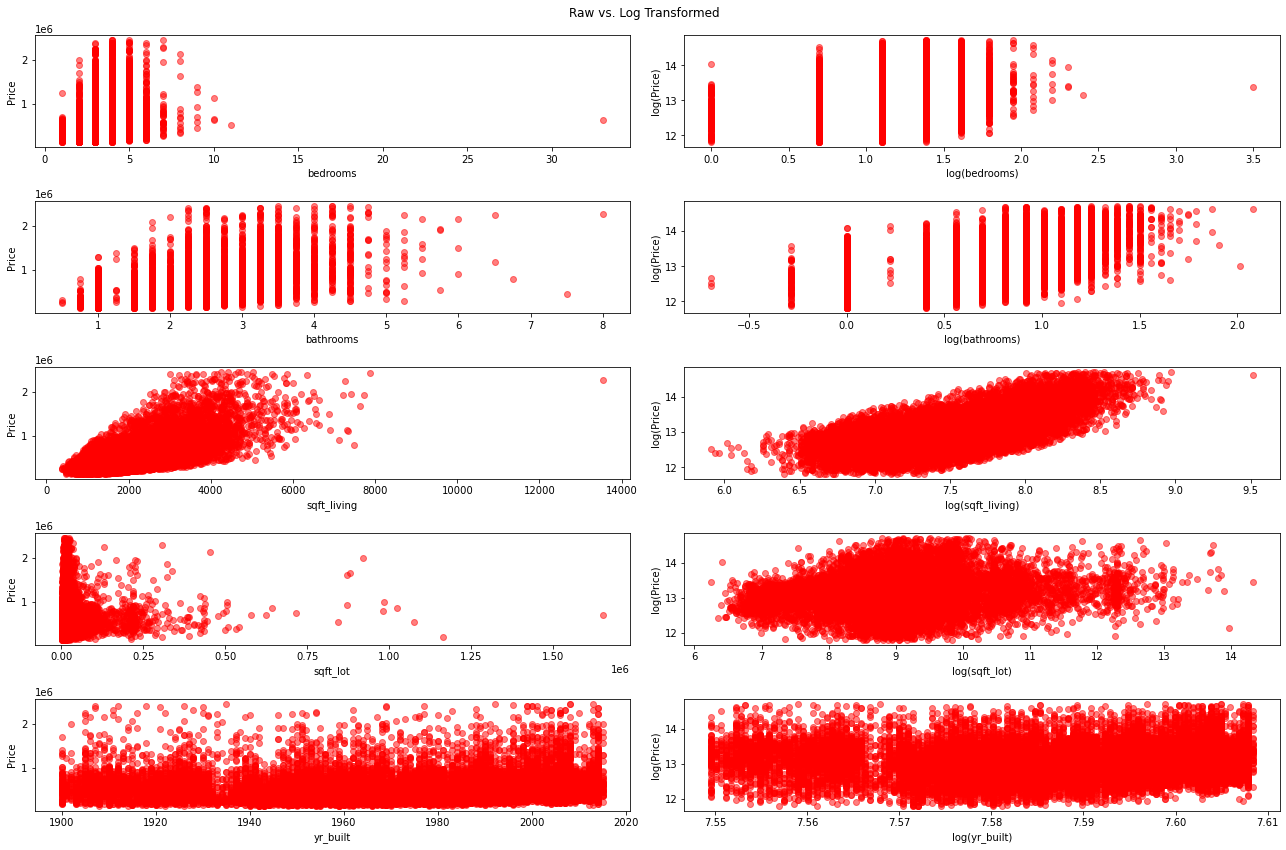

In [67]:
#selecting canditates for log transfomation and visualizing raw vs log tranformed variables
candidates = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "yr_built"]

fig, axes = plt.subplots(ncols=2, nrows=len(candidates), figsize=(18, 12))

for i, column in enumerate(candidates):
    # Plot raw version
    left_ax = axes[i][0]
    left_ax.scatter(X_2[column], y, alpha=0.5, color='red')
    left_ax.set_xlabel(column)
    left_ax.set_ylabel("Price")
    
    # Plot log transformed version
    right_ax = axes[i][1]
    right_ax.scatter(np.log(X_2[column]), np.log(y), alpha=0.5, color='red')
    right_ax.set_xlabel(f"log({column})")
    right_ax.set_ylabel("log(Price)")
    
fig.suptitle("Raw vs. Log Transformed")

fig.tight_layout()

## Log Model

In [68]:
X_log= X_2[candidates].copy()
X_log.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
count,21381.000000,21381.000000,21381.000000,2.138100e+04,21381.000000
mean,3.373509,2.111314,2068.995229,1.509650e+04,1971.107525
std,0.920334,0.751731,878.157610,4.159861e+04,29.345384
min,1.000000,0.500000,370.000000,5.200000e+02,1900.000000
25%,3.000000,1.750000,1430.000000,5.032000e+03,1952.000000
50%,3.000000,2.250000,1910.000000,7.600000e+03,1975.000000
75%,4.000000,2.500000,2540.000000,1.060300e+04,1997.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,2015.000000


In [69]:
X_log["yr_built"] = X_log["yr_built"] - 1900
X_log.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
count,21381.000000,21381.000000,21381.000000,2.138100e+04,21381.000000
mean,3.373509,2.111314,2068.995229,1.509650e+04,71.107525
std,0.920334,0.751731,878.157610,4.159861e+04,29.345384
min,1.000000,0.500000,370.000000,5.200000e+02,0.000000
25%,3.000000,1.750000,1430.000000,5.032000e+03,52.000000
50%,3.000000,2.250000,1910.000000,7.600000e+03,75.000000
75%,4.000000,2.500000,2540.000000,1.060300e+04,97.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,115.000000


In [70]:
y_log = np.log(y)
y_log.name = "log_Price"
y_log

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: log_Price, Length: 21381, dtype: float64

In [71]:
model = sm.OLS(y_log, sm.add_constant(X_log))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     4342.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:43:56   Log-Likelihood:                -8067.0
No. Observations:               21381   AIC:                         1.615e+04
Df Residuals:                   21375   BIC:                         1.619e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.4903      0.010   1210.266      

### Interprating the model
The model is statistically significant

The model explains about 50% of the variance in price. However the model has a lower adjusted r squared value compared to the previous model

To improve the model, we one hot code the grade of the house column to get to the model to 60%

### one-hot encoding for grade of the house column

In [72]:
grade_df= data_df.copy()
grade_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,NO,NONE,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,NO,NONE,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,NO,NONE,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,NO,NONE,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,NO,NONE,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,NO,NONE,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,NO,NONE,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,NO,NONE,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,NO,NONE,Average,8 Good,2004


In [73]:
grade_df= pd.get_dummies(data = data_df, columns=["grade"])
grade_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,yr_built,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,5650,NO,NONE,Average,1955,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,NO,NONE,Average,1951,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,NO,NONE,Average,1933,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,NO,NONE,Very Good,1965,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,8080,NO,NONE,Average,1987,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,NO,NONE,Average,2009,...,0,0,0,0,0,0,0,0,1,0
21593,6600060120,400000.0,4,2.50,2310,5813,NO,NONE,Average,2014,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,402101.0,2,0.75,1020,1350,NO,NONE,Average,2009,...,0,0,0,0,0,0,0,1,0,0
21595,291310100,400000.0,3,2.50,1600,2388,NO,NONE,Average,2004,...,0,0,0,0,0,0,0,0,1,0


In [74]:
X_3 = grade_df.drop(['id', 'price','waterfront','view','condition'], axis=1)
X_3

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,1180,5650,1955,0,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,1951,0,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,1933,0,0,0,0,0,0,0,1,0,0,0
3,4,3.00,1960,5000,1965,0,0,0,0,0,0,0,0,1,0,0
4,3,2.00,1680,8080,1987,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,2009,0,0,0,0,0,0,0,0,0,1,0
21593,4,2.50,2310,5813,2014,0,0,0,0,0,0,0,0,0,1,0
21594,2,0.75,1020,1350,2009,0,0,0,0,0,0,0,0,1,0,0
21595,3,2.50,1600,2388,2004,0,0,0,0,0,0,0,0,0,1,0


In [75]:
X_3.drop("grade_3 Poor", axis=1, inplace=True)

X_3

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,1180,5650,1955,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,1951,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,1933,0,0,0,0,0,0,1,0,0,0
3,4,3.00,1960,5000,1965,0,0,0,0,0,0,0,1,0,0
4,3,2.00,1680,8080,1987,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,2009,0,0,0,0,0,0,0,0,1,0
21593,4,2.50,2310,5813,2014,0,0,0,0,0,0,0,0,1,0
21594,2,0.75,1020,1350,2009,0,0,0,0,0,0,0,1,0,0
21595,3,2.50,1600,2388,2004,0,0,0,0,0,0,0,0,1,0


## Multi regression model with grade column one hot encoded

In [76]:
model2 = sm.OLS(y, sm.add_constant(X_3))
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2387.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:43:57   Log-Likelihood:            -2.9002e+05
No. Observations:               21381   AIC:                         5.801e+05
Df Residuals:                   21365   BIC:                         5.802e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.956e+06   2

In [77]:
final_mae= mean_absolute_error(y, results2.predict(sm.add_constant(X_3)))
print("The mean absolute error is: " , final_mae)


The mean absolute error is:  130794.15300613063


## Interprating the model
Overall this model is statistically significant and explains about 63% of the variance in price. 

The model is off by about $130,794.15.

The intercept is at about $6,956,000.

The coefficient for square foot living is about $118, bathrooms $58970, grade of low grade is $39730, fair $18260, low average $54850, average $147700, good $263000, better $430000 , very good  $606900, excellent $789100, luxury $999400, mansion $1519000. 

The model explains 63% of the variance in  price which has attained our target of a model explaining 60% of variance.

The price equation for this models is 
>> price= 118sqftliv + 58970bathroom +39730lowgrade +18260fair + 54850lowaverage +147700average +263000good +430000better +606900verygood +789100excellent +999400luxury +1519000mansion -24170bedrooms -2528yrbuilt -0.1571sqftlot

## Train Test

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [84]:
# calculate the mean squared error for the train test and test set
X = X_2
y = y
# split the model into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use linearregression from sklearn to build model and fit for training
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# predict target variable for training and testing data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# calculate residuals for training testing the data
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculate mean squared error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

# print out the mean squared error
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.12396820300632282
Test Mean Squared Error: 0.12409643051194857


>>The difference between the two errors is relatively small, which indicates that our model is not overfitting to the training data.The values of the mean squared error are quite high, which suggests that this model may not be the best fit for the data.

In [93]:
# calculate the mean squared error for the train test and test set
X2 = X_log
y2 = y_log

# split the model into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# use linearregression from sklearn to build model and fit for training
linreg2 = LinearRegression()
linreg2.fit(X_train2, y_train2)

# predict target variable for training and testing data
y_hat_train2 = linreg2.predict(X_train2)
y_hat_test2 = linreg2.predict(X_test2)

# calculate residuals for training testing the data
train_residuals2 = y_hat_train2 - y_train2
test_residuals2 = y_hat_test2 - y_test2

# calculate mean squared error
train_mse2 = mean_squared_error(y_train2, y_hat_train2)
test_mse2 = mean_squared_error(y_test2, y_hat_test2)

# print out the mean squared error
print('Train Mean Squared Error:', train_mse2)
print('Test Mean Squared Error:', test_mse2)

Train Mean Squared Error: 0.12459538376516421
Test Mean Squared Error: 0.12455602933564801


In [94]:
#Set shape to determine the sample size and feature size.
print("Training set shape: X={}, y={}".format(X_train.shape, y_train.shape))
print("Testing set shape: X={}, y={}".format(X_test.shape, y_test.shape))

Training set shape: X=(17104, 5), y=(17104,)
Testing set shape: X=(4277, 5), y=(4277,)


>>As we can see from the above output the training set has ```17,104``` samples with ```5``` features and the corresponding target variable 'price', while the testing set has ```4277``` samples with the same ```5``` features and 'price'. This essentially means that about ```75%``` of the data was used for training the model and ```25%``` was used for testing the model. The shape of the data printed out helps us to interpret how it can affect the performance of the machine learning model.

In [98]:
# calculate the mean squared error(MSE) for the train test and test set
X3 = X_3
y3 = y

# split the model into train and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# use linearregression from sklearn to build model and fit for training
linreg3 = LinearRegression()
linreg3.fit(X_train3, y_train3)

# predict target variable for training and testing data
y_hat_train3 = linreg3.predict(X_train3)
y_hat_test3 = linreg3.predict(X_test3)

# calculate residuals for training testing the data
train_residuals3 = y_hat_train3 - y_train3
test_residuals3 = y_hat_test3 - y_test3

# calculate mean squared error
train_mse3 = mean_squared_error(y_train3, y_hat_train3)
test_mse3 = mean_squared_error(y_test3, y_hat_test3)

# print out the mean squared error
print('Train Mean Squared Error:', train_mse3)
print('Test Mean Squared Error:', test_mse3)

Train Mean Squared Error: 0.09781216356595573
Test Mean Squared Error: 0.0951018665353933


In [99]:
#Set shape to determine the sample size and feature size.
print("Training set shape: X={}, y={}".format(X_train.shape, y_train.shape))
print("Testing set shape: X={}, y={}".format(X_test.shape, y_test.shape))

Training set shape: X=(17104, 5), y=(17104,)
Testing set shape: X=(4277, 5), y=(4277,)


In [106]:
def plot_residuals(y_train, y_hat_train, train_residuals, y_test, y_hat_test, test_residuals):
    """
    Plot histograms and scatter plots of the residuals to check for normality and constant variance.

    Arguments:
    y_train: actual target values for training set
    y_hat_train: predicted target values for training set
    train_residuals: residuals for training set (y_train - y_hat_train)
    y_test: actual target values for testing set
    y_hat_test: predicted target values for testing set
    test_residuals: residuals for testing set (y_test - y_hat_test)
    """
    # plotting histogram of residuals
    sns.histplot(train_residuals, kde=True, color='r')
    plt.title('Histogram of Residuals')
    plt.show()

    # plotting scatter plot of predicted values vs. residuals for training set
    plt.scatter(y_hat_train, train_residuals, color='cyan')
    plt.axhline(y=0, color='y', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals (Training Set)')
    plt.show()

    # plotting scatter plot of predicted values vs. residuals for testing set
    plt.scatter(y_hat_test, test_residuals, color='cyan')
    plt.axhline(y=0, color='y', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals (Testing Set)')
    plt.show()

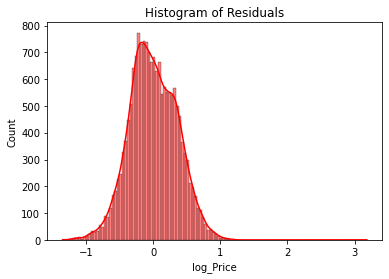

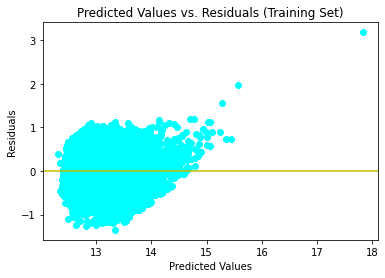

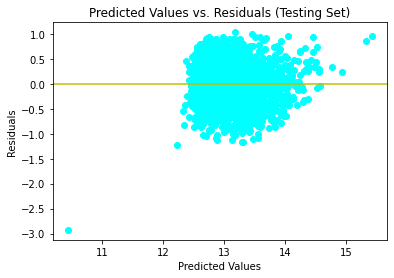

In [107]:
plot_residuals(y_train, y_hat_train, train_residuals, y_test, y_hat_test, test_residuals)

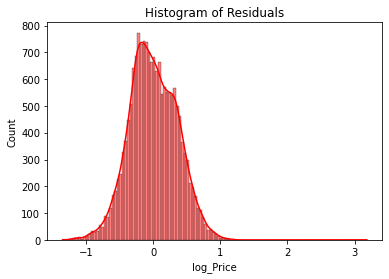

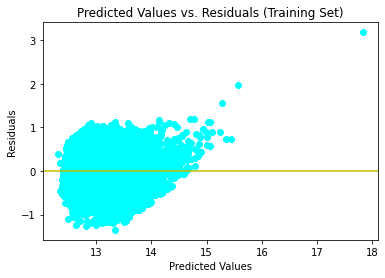

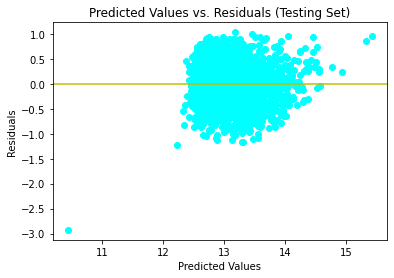

In [109]:
plot_residuals(y_train2, y_hat_train2, train_residuals2, y_test2, y_hat_test2, test_residuals2)


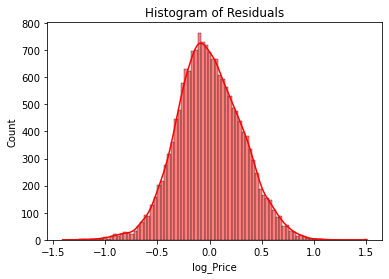

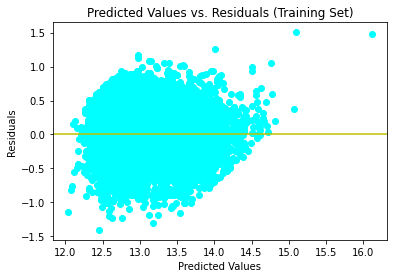

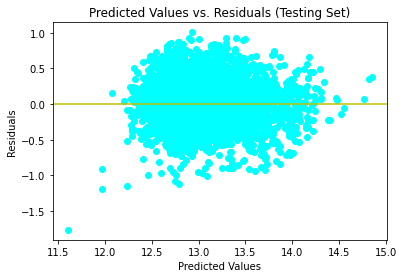

In [110]:
plot_residuals(y_train3, y_hat_train3, train_residuals3, y_test3, y_hat_test3, test_residuals3)

>> From our understanding, a good residual plot should show a random scatter of points around the horizontal line at y=0. This shows that the prediction from the model is unbiased and has an equal amount of estimations on both ends.
>> From the above plots that we have used a defined function to visualize, we see that the third model depicts a good residual plot since there is no increasing or decreasing spread of the points as seen by the predicted values.

>> According to the train tests performed the X_3 model is the best model because it has a lower MSE value which indicates better performance, and the difference between the train and test MSE values is also small which indicates that the model is not overfitting to the training data. 

# Model Results

* The base linear model had a adjusted R squared of 47%

* The second model was a multiple regression model which was one hot coded with condition column and had an adjusted rsquared of 53%

* The third mode was a log transformed model of the second model which had an adjusted rsquared of 50%. This model was lower compared to the second model and we opted an approach of one hot coding ankther categorical variable column called grade.

* The fourth model was a multiple one hot coded model of grade column and had an adjusted r squared of 63% which achieved our target of above 60%.

* All our models were statistically significant as they had a p value less than the significant value

* The Rsquared of the model improved from the first to second but dropped on the third log transformed model but improved to the forth to 63%

* We choose R-squared over RMSE because it provides a more interpretable measure of the goodness of fit of the model. Further, R-squared also takes into account the number of variables included in the model, which can be helpful in comparing models with different numbers of variables.

* The best trained model is the X3 model with a train and test MSE of approximately 0.097 which indicates that it does not overfit or underfit the data.


# Limitation

We assumed the variables in our model have equal variance 

We assumed the variables in our model are normally distributed

We assumed the variables in our model are linearly distributed

We assumed the variables in our model are indipendent

# Recommendations

1. The company should use the fourth model to predict the prices of houses since it is the best fit model as compared to the rest.

2. Grade, yr_built, sqft_living, bedrooms and bathrooms are the most important variables that affect the price of the house thus we would advise to invest most in the said variables since they generate more sales and following that, they'll be able to garner more income from every sell based on the features.

